In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings

np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [4]:
# Import data
train_data = pd.read_csv('datasets/Train.csv')
test_data = pd.read_csv('datasets/Test.csv')

In [5]:
# print shape 
print('train data shape :', train_data.shape)
print('test data shape :', test_data.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [6]:
# Inspect train Data
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
submission = pd.read_csv('datasets/SampleSubmission.csv')
submission.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [8]:
#show list of columns 
list(train_data.columns)  

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [9]:
## show Some information about the dataset 
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [10]:
# Check for missing values
print('missing values:', train_data.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


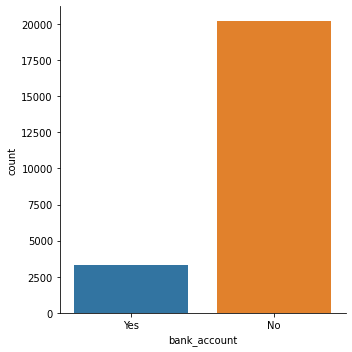

In [12]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train_data)

In [13]:
train_data['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [14]:
#import preprocessing module 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 

# Convert target label to numerical Data
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])

#Separate training features from target
X_train = train_data.drop(['bank_account'], axis=1)
y_train = train_data['bank_account']

X_train.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [15]:
# our target 
y_train.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int64

In [16]:
# Simple preprocessing function to handle
#
# - conversion of data types
# - convert categorical features to numerical by one-hot encoding method and label encoding
# - drop uniqueid variable
# - scaling our data into range of 0 and 1
#
# Function to preprocess our data from train models

def preprocessing_data(data):

    # Convert the following numerical labels from integer to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(
        float
    )

    # categorical features to be converted by One Hot Encoding
    categ = [
        "relationship_with_head",
        "marital_status",
        "education_level",
        "job_type",
        "country",
    ]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data

In [17]:
# preprocess the train data 
processed_train_data = preprocessing_data(X_train)

In [18]:
# the first train row 
processed_train_data[:1]

array([[1.       , 0.       , 1.       , 0.1      , 0.0952381, 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 1.       ,
        0.       , 0.       , 1.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 1.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 1.       , 1.       , 0.       , 0.       ,
        0.       ]])

In [19]:
# preprocess the test data
processed_test_data = preprocessing_data(test_data)

In [20]:
# the first test row
processed_test_data[:1]

array([[1.        , 1.        , 1.        , 0.10526316, 0.16666667,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ]])

In [21]:
# shape of the processed train set
processed_train_data.shape

(23524, 37)

In [22]:
# shape of the processed test set
processed_test_data.shape

(10086, 37)

In [23]:
# Build model and experiment

# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(processed_train_data, y_train, stratify = y_train,
                                                  test_size = 0.1, random_state=42)

In [24]:
#import classifier algorithm here 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier 

# create models 
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
xg_model = XGBClassifier()


#fitting the models
lg_model.fit(X_Train,y_Train)
rf_model.fit(X_Train,y_Train)
kn_model.fit(X_Train,y_Train)
et_model.fit(X_Train,y_Train)
xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
lg_y_pred = lg_model.predict(X_val)
rf_y_pred = rf_model.predict(X_val)
kn_y_pred = kn_model.predict(X_val)
et_y_pred = et_model.predict(X_val)
xg_y_pred = xg_model.predict(X_val)

# Get error rate
print("Error rate of Logistic Regression classifier: ", 1 - accuracy_score(y_val, lg_y_pred))
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_val, rf_y_pred))
print("Error rate of KNeighbors Classifier: ", 1 - accuracy_score(y_val, kn_y_pred))
print("Error rate of Extra Tree classifier: ", 1 - accuracy_score(y_val, et_y_pred))
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_pred))

Error rate of Logistic Regression classifier:  0.11219719507012327
Error rate of Random Forest classifier:  0.1368465788355291
Error rate of KNeighbors Classifier:  0.11984700382490443
Error rate of Extra Tree classifier:  0.14747131321716955
Error rate of XGB classifier:  0.10752231194220141


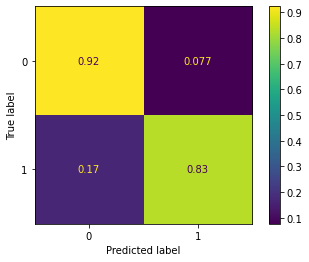

In [35]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

clf = SVC(random_state=0)
clf.fit(X_train, y_train)

SVC(random_state=0)
predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

In [36]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [37]:
# Optimize model paramaters 
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3,5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6}


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_val)

# Get error rate
print("Error rate of the  XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the  XGB classifier:  0.10922226944326396


In [39]:
# Get the predicted result for the test Data
test_data.bank_account = xgb_model.predict(processed_test_data)

In [40]:
# create submission DataFrame
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": test_data.bank_account})

In [44]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
8983,uniqueid_9258 x Tanzania,0
7358,uniqueid_7633 x Tanzania,1
4619,uniqueid_10754 x Rwanda,0
2350,uniqueid_8419 x Kenya,0
7059,uniqueid_7334 x Tanzania,0


In [47]:
# Create submission csv file
submission.to_csv('datasets/first_submission.csv', index = False)